Read the (private) leaderboard file for some stats

In [4]:
import datetime
import requests
from dotenv import load_dotenv
import os

load_dotenv()

True

In [5]:
YEAR = 2024
LEADERBOARD = 3240864

In [6]:
AOC_SESSION = os.getenv("AOC_SESSION")

headers = {"Cookie": f"session={AOC_SESSION}"}
url = f"https://adventofcode.com/{YEAR}/leaderboard/private/view/{LEADERBOARD}.json"

res = requests.get(url, headers=headers)
res.raise_for_status()
data = res.json()

In [7]:
members = data["members"]

In [9]:
# {name: [day1, day2, ...]} with for every day the timestamp of the first and second star
all_res = dict()
member_list = sorted(members.values(), key=lambda x: -x["local_score"])
for member_info in member_list:
    res = [None for _ in range(25)]
    name = member_info["name"]
    for day, day_info in member_info["completion_day_level"].items():
        day_res = [None, None]
        for star, star_info in day_info.items():
            day_res[int(star) - 1] = datetime.datetime.fromtimestamp(
                star_info["get_star_ts"]
            )
        res[int(day) - 1] = day_res
    all_res[name] = res
# all_res

In [16]:
# Print the results for a specific day
day = 23
for name, times in all_res.items():
    if times[day - 1] is None:
        continue

    ts = ["" if ts is None else ts.strftime("%d %H:%M:%S") for ts in times[day - 1]]
    print(f"{str(name):17s}: {ts[0]:11s}|{ts[1]:11s}")

Jacob            : 23 07:29:56|23 08:02:11
Jarro van Ginkel : 23 06:50:52|23 07:14:40
Maria Pu         : 23 11:27:35|23 21:07:49
mvp1998          : 23 09:12:29|23 19:18:45
Luca Lin         : 26 13:30:13|26 16:06:32
SheepiCagio      : 24 22:06:02|24 22:38:54


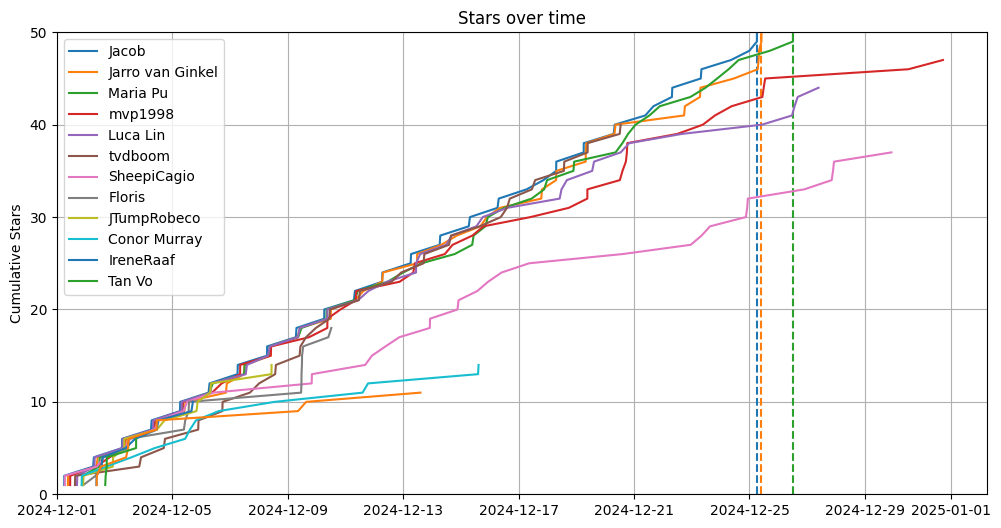

In [12]:
# Plot cuulative stars over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for name, times in all_res.items():
    all_ts = [
        t for day_ts in times if day_ts is not None for t in day_ts if t is not None
    ]
    cumul = sorted(all_ts)
    stars = list(range(1, len(cumul) + 1))
    (line,) = plt.plot(cumul, stars, label=name)
    color = line.get_color()
    if len(stars) == 50:
        plt.axvline(x=cumul[-1], color=color, linestyle="--")
plt.ylim(0, 50)
plt.xlim(left=datetime.datetime(YEAR, 12, 1))
plt.ylabel("Cumulative Stars")
plt.title("Stars over time")
plt.legend()
plt.grid(True)
plt.show()